<a href="https://colab.research.google.com/github/Shrutakeerti/AI-ML-assignments/blob/main/Assignement9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/diabetes(in).csv/content/diabetes(in).csv


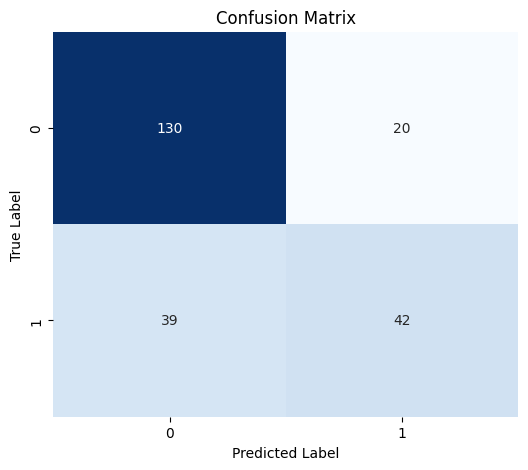

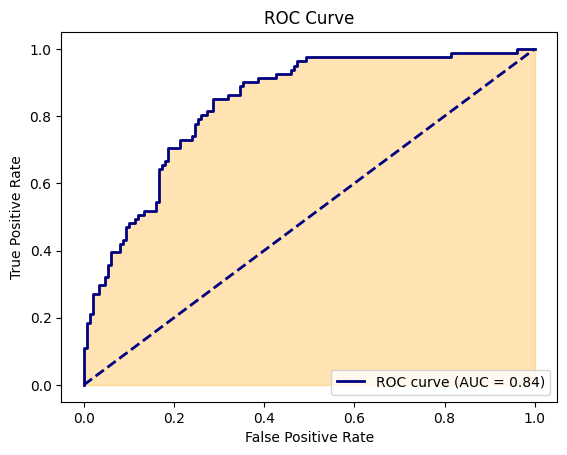

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load dataset
data = pd.read_csv(input("/content/diabetes(in).csv"))
X, y = data.drop(columns='Outcome'), data['Outcome']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_test = StandardScaler().fit_transform(X_train), StandardScaler().fit(X_train).transform(X_test)

# Train model and predict
model = LogisticRegression().fit(X_train, y_train)
y_pred, y_prob = model.predict(X_test), model.predict_proba(X_test)[:, 1]

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.fill_between(fpr, tpr, alpha=0.3, color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
